In [1]:
import pandas as pd 
import numpy as np

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')

# EDA

 - The data has 19 columns
 - 4 columns are objects others are numeric(float, int)
 - Release date column is very similar to year column but it is more detailed for recent periods
 - id and name columns look unnecessary
 - Artists column have 34088 unique values. Cardinality is too high
 - Except our target columns popularity we have 14 numeric features
 - Popularity varies between 0-100
 - Explicit and mode columns are boolean
 - There are no null values.

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [5]:
df.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [6]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [7]:
df.nunique()

valence               1733
year                   100
acousticness          4689
artists              34088
danceability          1240
duration_ms          51755
energy                2332
explicit                 2
id                  170653
instrumentalness      5401
key                     12
liveness              1740
loudness             25410
mode                     2
name                133638
popularity             100
release_date         11244
speechiness           1626
tempo                84694
dtype: int64

In [8]:
prof = ProfileReport(df)

We have several features as object type, the problem is popularity is strictly connected with year. 
And the year feature is distrupting the model because of high cardinality and lack of causality.
If the idea is creating a model that can predict a new song would be popular or not, year is not beneficiary.

Drop Unnecessary columns

In [9]:
df_str = df[['id', 'name','release_date', 'year']]
df_num = df.drop(df_str, axis = 1)

Plot target value

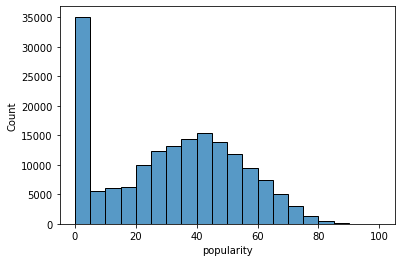

In [10]:
popularity = sns.histplot(data=df_num, x = 'popularity',bins = 20 )

According to histogram above, our target follows normal distribution after the popularity score of 20.
And if we define popularity as the being higher than the average; 
popularity score of 50 could be the point of discrimination for a binary classification problem

Encode popularity into a binary form of popular and unpopular. The threshold score is 40.

In [11]:
df_num.popularity = (df_num.popularity > 50).values*1
target = df_num.popularity
X = df_num.drop('popularity', axis = 1)

### Split Data

In [12]:
X_train_1, X_test_1, y_train, y_test = train_test_split( X, target, test_size=0.33, random_state=42)
X_train = X_train_1.drop('artists', axis =1)
X_test= X_test_1.drop('artists', axis =1)

Class distributions

Percent Distribution of Potential Popular class:- 
 0    78.720799
1    21.279201
Name: popularity, dtype: float64


Text(0, 0.5, 'Number of Songs per Class ')

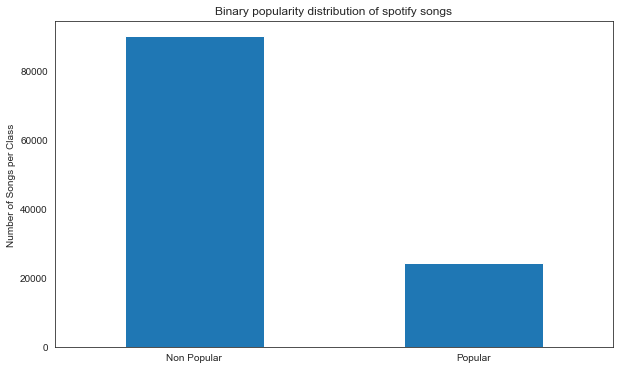

In [13]:
#PLotting the frequencies of fraud and non-fraud Merged transactions in the data

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(y_train, sort = True)
print("Percent Distribution of Potential Popular class:- \n",count_classes*100/len(y_train))
LABELS = ["Non Popular", "Popular"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Binary popularity distribution of spotify songs")
plt.xticks(range(2), LABELS)
plt.ylabel("Number of Songs per Class ")

We need to split data before starting EDA because including test data into our analysis creates bias

**Histograms of our feature set**

In [14]:
X_train.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
125020,0.329,0.987,0.466,183400,0.240,0,0.000116,6,0.0681,-9.085,1,0.0460,134.402
95445,0.317,0.900,0.326,199907,0.402,0,0.839000,7,0.6170,-11.702,1,0.0417,86.188
48551,0.553,0.018,0.427,386667,0.730,0,0.000364,9,0.2180,-6.173,0,0.0360,106.255
34968,0.472,0.265,0.699,254467,0.668,0,0.000000,1,0.1410,-5.305,1,0.1060,83.074
31555,0.158,0.968,0.336,239467,0.167,0,0.001480,2,0.0806,-10.552,0,0.0386,128.139


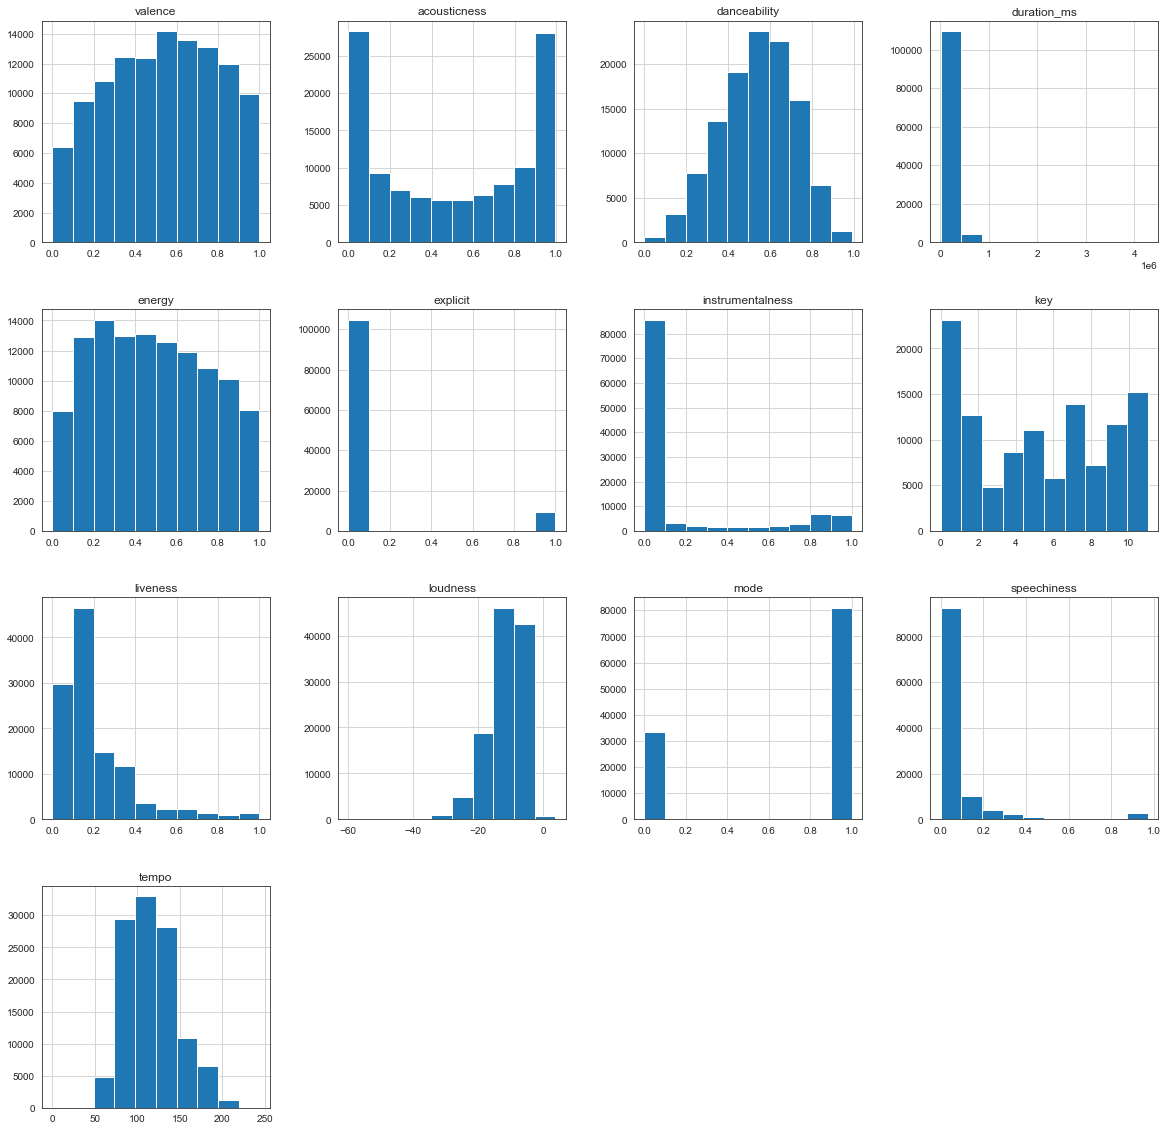

In [15]:
X_train.hist(figsize=(20, 20))
plt.show()

 - Histograms help us to understand the distribution shape of a feature.
 - According to distribution shape, we might use the feature in an algorithm that has linearity or normality assumption, Or, We can implement normalization or transformation (log, exp etc.) to use that feature. 
 - For example, danceability feature has a normal distribution but speechiness shows kind of log distribution. So, if you are planning to implement a linear regression model, you need to transform second feature and check the linearity assumption.
 - We are working on a classification problem, so we don't have to follow this pipeline. However, implementing this methods could still boost our model performance.

### Correlation Matrix

In [16]:
X_train.assign(popularity=y_train)

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
125020,0.3290,0.9870,0.466,183400,0.2400,0,0.000116,6,0.0681,-9.085,1,0.0460,134.402,0
95445,0.3170,0.9000,0.326,199907,0.4020,0,0.839000,7,0.6170,-11.702,1,0.0417,86.188,0
48551,0.5530,0.0180,0.427,386667,0.7300,0,0.000364,9,0.2180,-6.173,0,0.0360,106.255,0
34968,0.4720,0.2650,0.699,254467,0.6680,0,0.000000,1,0.1410,-5.305,1,0.1060,83.074,1
31555,0.1580,0.9680,0.336,239467,0.1670,0,0.001480,2,0.0806,-10.552,0,0.0386,128.139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.1620,0.4940,0.260,321893,0.3280,0,0.000168,4,0.1100,-12.086,0,0.0342,91.374,0
103694,0.8620,0.3640,0.787,214933,0.8600,0,0.041000,1,0.0612,-4.974,1,0.0344,109.154,0
131932,0.6060,0.9770,0.494,419507,0.7430,0,0.390000,5,0.6430,-6.595,1,0.0906,113.276,0
146867,0.0402,0.9740,0.273,143000,0.0315,0,0.978000,11,0.1130,-25.332,1,0.0469,183.984,0


<AxesSubplot:>

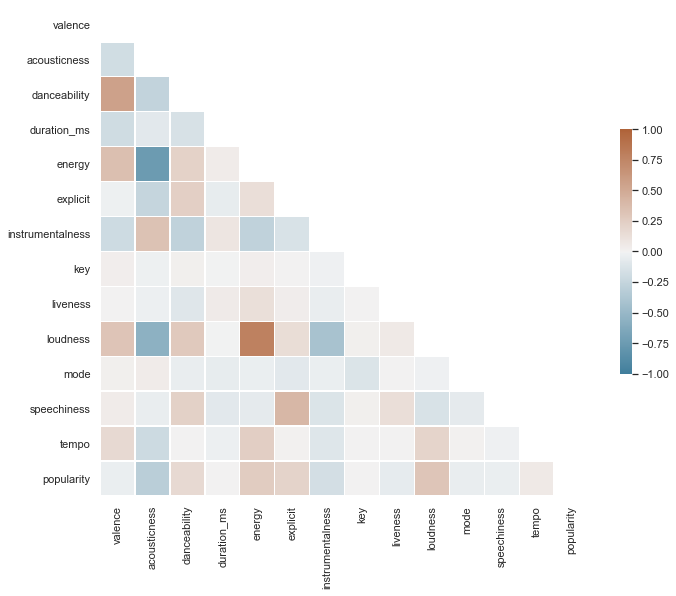

In [17]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = X_train.assign(popularity=y_train).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 30, as_cmap= True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Heatmap of correlations would be beneficial to understand the relations between our features and target.

 - We can observe the level of correlation between our features and target. However, the problem with correlation is the assumption of linearity. 
 - Correlation coefficient shows the linear relationship between features, but our features would have quadratic relationship.
#And this assumption is not valid according to our histograms.
 - It is useful to check correlation but one needs to be aware of assumptions.

#### Logistic Regression

In [18]:
#Solver Default

In [19]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

print('Train Accuracy :' ,clf.score(X_train, y_train))
print('Train AUC : ' ,roc_auc_score(y_train, clf.predict_proba(X_train).T[1]))
print('Test Accuracy :' ,clf.score(X_test, y_test))
print('Test AUC : ' ,roc_auc_score(y_test, clf.predict_proba(X_test).T[1]))

Train Accuracy : 0.7880651057837795
Train AUC :  0.7496114644341656
Test Accuracy : 0.789313871723844
Test AUC :  0.750144952140415


Logit model doesn't work well compared to gradient boosting.
The root cause would be the shape of the cost function. 
If we try another solver which is able to handle non-convex optimization problems, it would perform better.

In [20]:
#Solver newton-cg

In [21]:
clf = LogisticRegression(random_state=42, solver = 'newton-cg').fit(X_train, y_train)

print('Train Accuracy :' ,clf.score(X_train, y_train))
print('Train AUC : ' ,roc_auc_score(y_train, clf.predict_proba(X_train).T[1]))
print('Test Accuracy :' ,clf.score(X_test, y_test))
print('Test AUC : ' ,roc_auc_score(y_test, clf.predict_proba(X_test).T[1]))

Train Accuracy : 0.8122042733323421
Train AUC :  0.8078983389660184
Test Accuracy : 0.8123623836920236
Test AUC :  0.8071837061259486


Using newton-cg solver, logit is able to achieve better results in terms of both accuracy and AUC scores

#### Gradient Boosting

In [22]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

print('Accuracy :' ,gbc.score(X_train, y_train))
print('AUC : ' ,roc_auc_score(y_train, gbc.predict_proba(X_train).T[1]))
print('Accuracy :' ,gbc.score(X_test, y_test))
print('AUC : ' ,roc_auc_score(y_test, gbc.predict_proba(X_test).T[1]))

Accuracy : 0.8289180230371621
AUC :  0.8427904700895278
Accuracy : 0.8268698060941828
AUC :  0.8377180013973688


In [23]:
pd.DataFrame([X_train.columns, gbc.feature_importances_]).T

,0,1
0,valence,0.0794034
1,acousticness,0.109022
2,danceability,0.056296
3,duration_ms,0.0561366
4,energy,0.0295285
5,explicit,0.0700259
6,instrumentalness,0.04927
7,key,0
8,liveness,0.0149855
9,loudness,0.484558


Ensemble algorithms handle different feature structures better.

### Improvements

We should analyze each feature individually and implement single factor analysis with respect to target classes to improve model performance.

Histogram of each feature regarding target classes

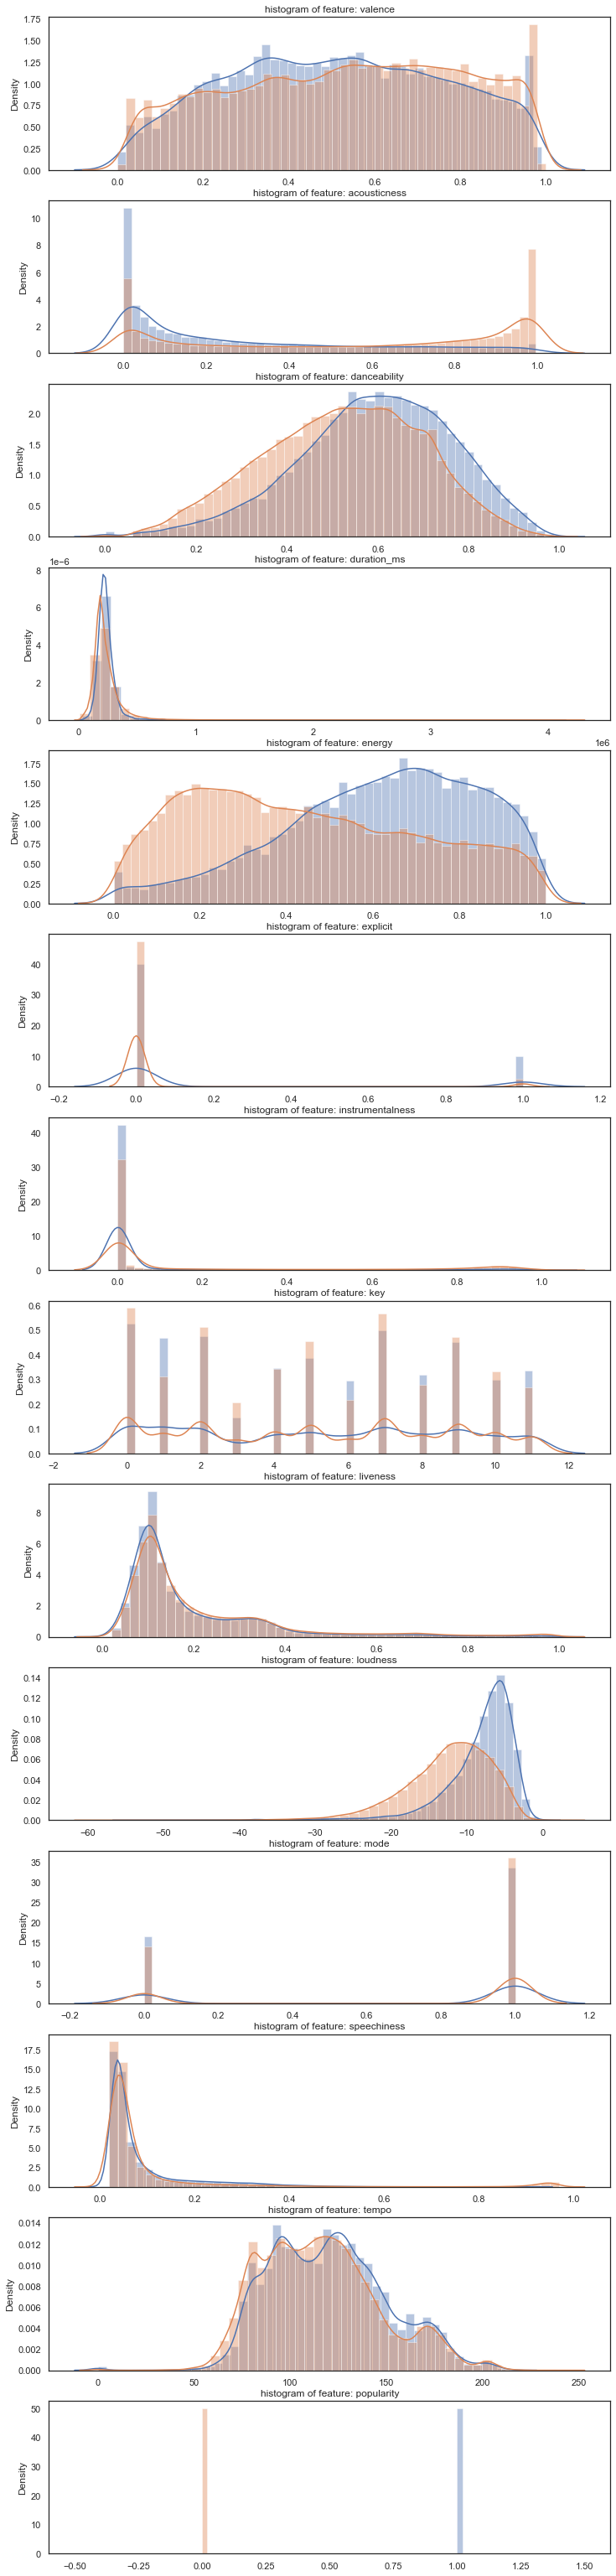

In [24]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(X_train.assign(popularity=y_train)):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train.assign(popularity=y_train)[cn][X_train.assign(popularity=y_train).popularity == 1], bins=50)
    sns.distplot(X_train.assign(popularity=y_train)[cn][X_train.assign(popularity=y_train).popularity == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

**PCA**

<Figure size 432x288 with 0 Axes>

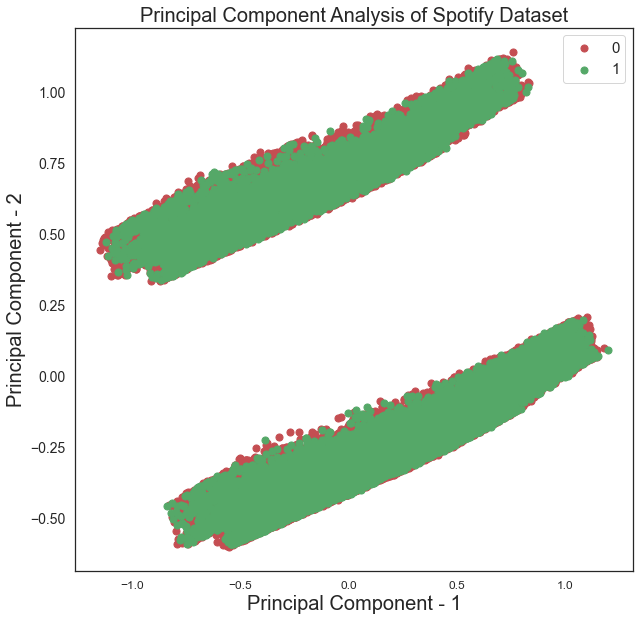

In [25]:
from sklearn import preprocessing
from sklearn import decomposition
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train_norm = pd.DataFrame(x_scaled)

pca = decomposition.PCA(n_components=2)
pca.fit(X_train_norm)
X = pca.transform(X_train_norm)

X_pca = pd.DataFrame(X, columns = ['PCA-1' , 'PCA-2'])
X_pca['Labels'] = y_train



plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Spotify Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = X_pca['Labels'] == target
    plt.scatter(X_pca.loc[indicesToKeep, 'PCA-1']
               , X_pca.loc[indicesToKeep, 'PCA-2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

2D PCA transformation shows a low discriminative power. We need some feature engineering.

### Feature Enginering

***log transformation***

In [26]:
X_train.loc[:,['acousticness',
               'duration_ms', 
               'speechiness', 
               'instrumentalness']] = X_train.loc[:,['acousticness',
                                                     'duration_ms', 
                                                     'speechiness', 
                                                     'instrumentalness']].transform(lambda x: np.log(x+0.01))

X_test.loc[:,['acousticness',
               'duration_ms', 
               'speechiness', 
               'instrumentalness']] = X_test.loc[:,['acousticness',
                                                     'duration_ms', 
                                                     'speechiness', 
                                                     'instrumentalness']].transform(lambda x: np.log(x+0.01))

Scaling

In [27]:
x = X_train.values #returns a numpy array
xt = X_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xt_scaled = min_max_scaler.transform(xt)
X_train = pd.DataFrame(x_scaled, columns = X_train.columns)
X_test = pd.DataFrame(xt_scaled, columns = X_train.columns)

First of all, we implemented log transformation on necessary features

***PCA transformation for highly correlated features***

***Corr check***

 - We already know that energy and loudness features have high positive correlation.(0.782089)
 - After log transformation, acousticness and energy features also show high negative corralation(-0.696303)

we can check the relation between these 3 features.

<AxesSubplot:xlabel='energy', ylabel='loudness'>

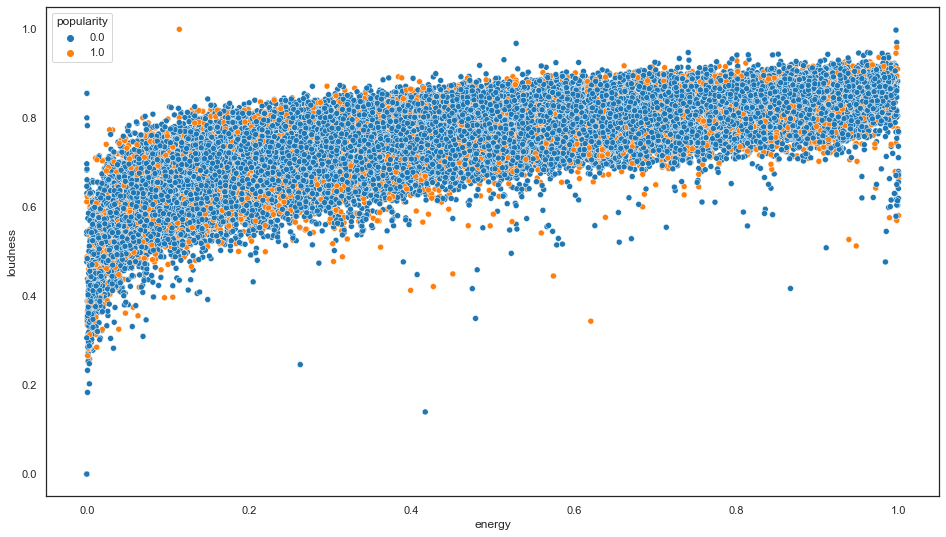

In [28]:
fig, ax = plt.subplots(figsize=(16,9))
sns.scatterplot(ax = ax, x = X_train.energy, y = X_train.loudness, hue = y_train, palette = sns.color_palette("tab10",2))

<AxesSubplot:xlabel='energy', ylabel='acousticness'>

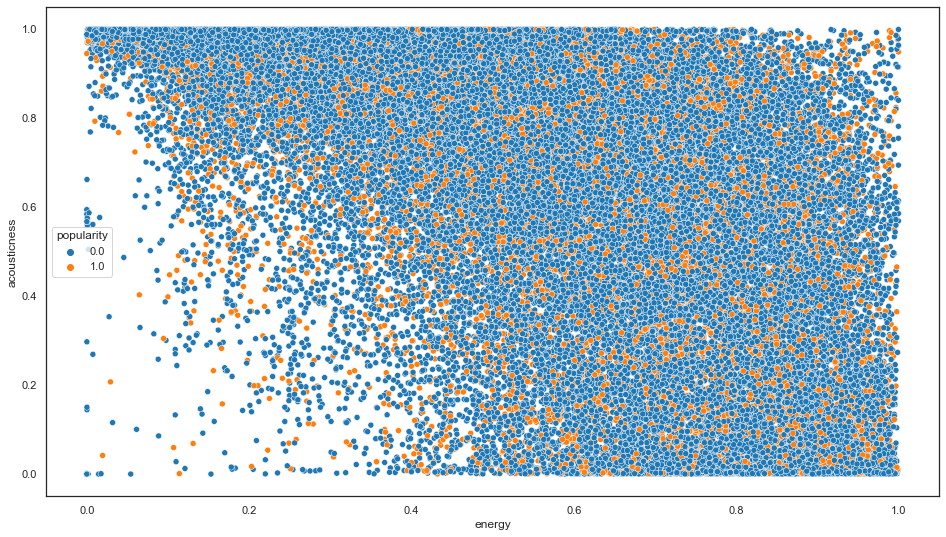

In [29]:
fig, ax = plt.subplots(figsize=(16,9))
sns.scatterplot(ax = ax, x = X_train.energy, y = X_train.acousticness, hue = y_train, palette = sns.color_palette('tab10',2))

PCA Trial

Discritization

Encoding and Grouping

***Text Mining***

Most of the classification algorithms are not able to process string columns. 
If data consists of raw string columns, it is possible to boost the performance by mining these string columns.
Our spotify dataset consists of artists column. We can investigate and try to create a few new features.

In [30]:
X_train_1.head()

,valence,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
125020,0.329,0.987,['Αντώνης Διαμαντίδης'],0.466,183400,0.240,0,0.000116,6,0.0681,-9.085,1,0.0460,134.402
95445,0.317,0.900,"['Modest Mussorgsky', 'Arturo Toscanini']",0.326,199907,0.402,0,0.839000,7,0.6170,-11.702,1,0.0417,86.188
48551,0.553,0.018,['Kansas'],0.427,386667,0.730,0,0.000364,9,0.2180,-6.173,0,0.0360,106.255
34968,0.472,0.265,"['Jennifer Lopez', 'LL Cool J']",0.699,254467,0.668,0,0.000000,1,0.1410,-5.305,1,0.1060,83.074
31555,0.158,0.968,['Les Misérables-Original London Cast'],0.336,239467,0.167,0,0.001480,2,0.0806,-10.552,0,0.0386,128.139


In [31]:
X_train_art = pd.merge(
                            (
                                X_train_1
                                .assign(popularity=y_train)[['popularity', 'artists']]
                                .groupby('artists')
                                .mean()
                                .sort_values(by = 'popularity')
                            ) ,   

                            (
                                X_train_1
                                .assign(popularity=y_train)[['popularity', 'artists']]
                                .groupby('artists')
                                .count()
                                .sort_values(by = 'popularity')
                            ) ,
                            left_index = True,
                            right_index = True
                    )


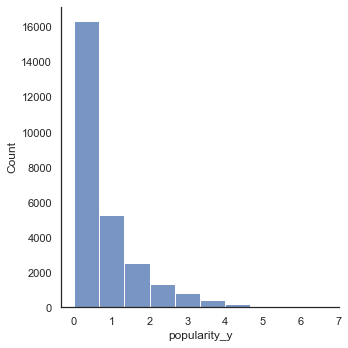

In [32]:
(
    sns.displot(x = X_train_art
                .popularity_y
                .apply(lambda x: np.log(x)) 
                ,bins = 10)
)

In [33]:
artist_flag = X_train_art.loc[(X_train_art['popularity_y']>10) & (X_train_art['popularity_x']>0.5) ,:].index

In [34]:
artist_flag

Index(['['La Arrolladora Banda El Limón De Rene Camacho']',
       '['Kelly Clarkson']', '['Sufjan Stevens']', '['Maroon 5']',
       '["Destiny's Child"]', '['Limp Bizkit']', '['A Perfect Circle']',
       '['Sum 41']', '['Massive Attack']', '['Rebelution']',
       ...
       '['RBD', 'Anahí', 'Dulce María', 'Maite Perroni', 'Christian Chávez', 'Christopher von Uckermann', 'Alfonso Herrera']',
       '['NF']', '['Niall Horan']', '['Harry Styles']', '['Khalid']',
       '['King Von']', '['Sleeping At Last']', '['Juice WRLD']', '['Joji']',
       '['Kali Uchis']'],
      dtype='object', name='artists', length=262)

In [35]:
X_train['pop_artist_flag'] = np.where(X_train_1.artists.isin(artist_flag), 1,0)
X_test['pop_artist_flag'] = np.where(X_test_1.artists.isin(artist_flag), 1,0)

In [36]:
X_train.drop(['key', 'mode','tempo'], axis = 1, inplace = True)
X_test.drop(['key', 'mode','tempo'], axis = 1, inplace = True)

***New Models***

In [37]:
clf = LogisticRegression(random_state=42, solver = 'newton-cg').fit(X_train, y_train)

print('train Accuracy :' ,clf.score(X_train, y_train))
print('train AUC : ' ,roc_auc_score(y_train, clf.predict_proba(X_train).T[1]))
print('test Accuracy :' ,clf.score(X_test, y_test))
print('test AUC : ' ,roc_auc_score(y_test, clf.predict_proba(X_test).T[1]))

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

print('train Accuracy : ' ,gbc.score(X_train, y_train))
print('train AUC : ' ,roc_auc_score(y_train, gbc.predict_proba(X_train).T[1]))
print('test Accuracy :' ,gbc.score(X_test, y_test))
print('test AUC : ' ,roc_auc_score(y_test, gbc.predict_proba(X_test).T[1]))

pd.DataFrame([X_train.columns, gbc.feature_importances_]).T

train Accuracy : 0.8268102189142622
train AUC :  0.8202665316741977
test Accuracy : 0.8257866325733362
test AUC :  0.8172146806474958
train Accuracy :  0.8398943474115991
train AUC :  0.8535843755057805
test Accuracy : 0.8365295830669792
test AUC :  0.8470367979857615


,0,1
0,valence,0.0549262
1,acousticness,0.0906422
2,danceability,0.0402663
3,duration_ms,0.0386472
4,energy,0.0206945
5,explicit,0.0557484
6,instrumentalness,0.0364999
7,liveness,0.0117944
8,loudness,0.414113
9,speechiness,0.0155879


Undersampling

In [38]:
from imblearn.under_sampling import TomekLinks

In [39]:
undersample = TomekLinks()
# transform the dataset
Xtl, ytl = undersample.fit_resample(X_train, y_train)
# summarize the new class distribution
Xtl.describe()

,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,speechiness,pop_artist_flag
count,108549.000000,108549.000000,108549.000000,108549.000000,108549.000000,108549.000000,108549.000000,108549.000000,108549.000000,108549.000000,108549.000000
mean,0.528437,0.723154,0.541912,0.537021,0.476417,0.082451,0.261061,0.206685,0.758091,0.430511,0.056887
std,0.263719,0.315114,0.178317,0.065292,0.267512,0.275052,0.380027,0.175637,0.089552,0.159340,0.231627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316000,0.540690,0.418016,0.503696,0.249000,0.000000,0.000000,0.099000,0.707948,0.328045,0.000000
50%,0.540000,0.868262,0.552632,0.534292,0.461000,0.000000,0.005350,0.136000,0.771451,0.372209,0.000000
75%,0.748000,0.978488,0.674089,0.571206,0.697000,0.000000,0.552411,0.262000,0.825589,0.468546,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
clf = LogisticRegression(random_state=42, solver = 'newton-cg').fit(Xtl, ytl)

print('train_1 Accuracy :' ,clf.score(Xtl, ytl))
print('train_1 AUC : ' ,roc_auc_score(ytl, clf.predict_proba(Xtl).T[1]))
print('test_1 Accuracy :' ,clf.score(X_test, y_test))
print('test_1 AUC : ' ,roc_auc_score(y_test, clf.predict_proba(X_test).T[1]))

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

print('Accuracy :' ,gbc.score(Xtl, ytl))
print('AUC : ' ,roc_auc_score(ytl, gbc.predict_proba(Xtl).T[1]))
print('Accuracy :' ,gbc.score(X_test, y_test))
print('AUC : ' ,roc_auc_score(y_test, gbc.predict_proba(X_test).T[1]))

pd.DataFrame([Xtl.columns, gbc.feature_importances_]).T

train_1 Accuracy : 0.8285751135431925
train_1 AUC :  0.8339424258658387
test_1 Accuracy : 0.8267099936075005
test_1 AUC :  0.817382373594976
Accuracy : 0.8425503689577979
AUC :  0.8675672269545901
Accuracy : 0.8365295830669792
AUC :  0.8470367979857615


,0,1
0,valence,0.0549262
1,acousticness,0.0906422
2,danceability,0.0402663
3,duration_ms,0.0386472
4,energy,0.0206945
5,explicit,0.0557484
6,instrumentalness,0.0364999
7,liveness,0.0117944
8,loudness,0.414113
9,speechiness,0.0155879
